In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score,make_scorer,f1_score

Let's create a pandas dataframe for each class and then combine them together

In [16]:
df_readrandom = pd.read_csv('readrandom.txt', delimiter=',')
df_readrandom['label'] = 'readrandom'

In [17]:
df_readrandomwriterandom = pd.read_csv('readrandomwriterandom.txt', delimiter=',')
df_readrandomwriterandom['label'] = 'readrandomwriterandom'

In [18]:
df_readreverse = pd.read_csv('readreverse.txt', delimiter=',')
df_readreverse['label'] = 'readreverse'

In [19]:
df_readseq = pd.read_csv('readseq.txt', delimiter=',')
df_readseq['label'] = 'readseq'

In [20]:
df_readrandom.head()

,Ino,State,flag,transaction,time elapsed,culmulative time elapsed,label
0,131274,5,4,2364.211512,0.000423,0.000423,readrandom
1,136200,0,1,4169.446298,0.000240,0.000663,readrandom
2,136200,0,1,548245.614035,0.000002,0.000665,readrandom
3,136200,0,1,94975.781176,0.000011,0.000675,readrandom
4,136200,1,4,33148.804986,0.000030,0.000705,readrandom


In [21]:
df_readrandomwriterandom.head()

,Ino,State,flag,transaction,time elapsed,culmulative time elapsed,label
0,8388610,4.0,4.0,196889.151408,0.000005,0.000005,readrandomwriterandom
1,8388610,4.0,4.0,270489.586151,0.000004,0.000009,readrandomwriterandom
2,8388610,4.0,4.0,530785.562633,0.000002,0.000011,readrandomwriterandom
3,8388610,4.0,4.0,635727.908455,0.000002,0.000012,readrandomwriterandom
4,8388610,4.0,4.0,915750.915751,0.000001,0.000013,readrandomwriterandom


In [22]:
df_readreverse.head()

,Ino,State,flag,transaction,time elapsed,culmulative time elapsed,label
0,131275,0,1,8.903927e+04,1.123100e-05,0.000011,readreverse
1,131275,0,1,1.692047e+06,5.910000e-07,0.000012,readreverse
2,131275,0,1,1.434103e+05,6.973000e-06,0.000019,readreverse
3,131275,1,4,3.477051e+05,2.876000e-06,0.000022,readreverse
4,131275,5,4,1.890359e+05,5.290000e-06,0.000027,readreverse


In [23]:
df_readseq.head()

,Ino,State,flag,transaction,time elapsed,culmulative time elapsed,label
0,131274,5,4,4771.561493,0.000210,0.000210,readseq
1,136329,0,1,37657.691584,0.000027,0.000236,readseq
2,136329,0,1,697836.706211,0.000001,0.000238,readseq
3,136329,0,1,106746.370623,0.000009,0.000247,readseq
4,136329,1,4,39142.007202,0.000026,0.000272,readseq


In [24]:
df = pd.concat([df_readrandom, df_readrandomwriterandom, df_readreverse, df_readseq], ignore_index=True)

In [25]:
print(df_readrandom.shape)

(54345, 7)


In [26]:
print(df_readrandomwriterandom.shape)

(124784, 7)


In [27]:
print(df_readreverse.shape)

(5515, 7)


In [28]:
print(df_readseq.shape)

(2742, 7)


In [29]:
df.head()

,Ino,State,flag,transaction,time elapsed,culmulative time elapsed,label
0,131274,5.0,4.0,2364.211512,0.000423,0.000423,readrandom
1,136200,0.0,1.0,4169.446298,0.000240,0.000663,readrandom
2,136200,0.0,1.0,548245.614035,0.000002,0.000665,readrandom
3,136200,0.0,1.0,94975.781176,0.000011,0.000675,readrandom
4,136200,1.0,4.0,33148.804986,0.000030,0.000705,readrandom


In [30]:
df.to_csv('data2.csv', index=False)

In [2]:
file_path = 'data2.csv'
df = pd.read_csv(file_path)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187386 entries, 0 to 187385
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Ino                       187386 non-null  int64  
 1   State                     187385 non-null  float64
 2   flag                      187385 non-null  float64
 3   transaction               187385 non-null  float64
 4   time elapsed              187385 non-null  float64
 5   culmulative time elapsed  187385 non-null  float64
 6   label                     187386 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 10.0+ MB


In [32]:
df.describe()

,Ino,State,flag,transaction,time elapsed,culmulative time elapsed
count,1.873860e+05,187385.000000,187385.000000,1.873850e+05,1.873850e+05,187385.000000
mean,6.331415e+05,147.693668,4.981274,7.932631e+05,3.699658e-03,90.112433
std,1.612108e+07,4187.265681,2.786413,2.670250e+06,3.698764e-02,166.317465
min,5.000000e+00,0.000000,1.000000,1.000651e+00,1.000000e-09,0.000005
25%,4.613600e+04,7.000000,1.000000,1.211240e+05,7.210000e-07,1.891686
50%,7.865150e+05,7.000000,7.000000,4.158004e+05,2.405000e-06,2.464745
75%,7.865150e+05,7.000000,7.000000,1.386963e+06,8.256000e-06,112.060939
max,4.026532e+09,131207.000000,7.000000,1.000000e+09,9.993490e-01,655.795707


In [3]:
missing_values = df.isnull().sum()

print("Number of missing values in each column:")
print(missing_values)

df = df.dropna()

df.info()

Number of missing values in each column:
Ino                         0
State                       1
flag                        1
transaction                 1
time elapsed                1
culmulative time elapsed    1
label                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 187385 entries, 0 to 187385
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Ino                       187385 non-null  int64  
 1   State                     187385 non-null  float64
 2   flag                      187385 non-null  float64
 3   transaction               187385 non-null  float64
 4   time elapsed              187385 non-null  float64
 5   culmulative time elapsed  187385 non-null  float64
 6   label                     187385 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 11.4+ MB


In [4]:
label_encoder = LabelEncoder()

df['label_encoded'] = label_encoder.fit_transform(df['label'])

df.head()

,Ino,State,flag,transaction,time elapsed,culmulative time elapsed,label,label_encoded
0,131274,5.0,4.0,2364.211512,0.000423,0.000423,readrandom,0
1,136200,0.0,1.0,4169.446298,0.000240,0.000663,readrandom,0
2,136200,0.0,1.0,548245.614035,0.000002,0.000665,readrandom,0
3,136200,0.0,1.0,94975.781176,0.000011,0.000675,readrandom,0
4,136200,1.0,4.0,33148.804986,0.000030,0.000705,readrandom,0


In [5]:
df = df.drop(columns=['label_encoded'])

In [6]:
df.head()

,Ino,State,flag,transaction,time elapsed,culmulative time elapsed,label
0,131274,5.0,4.0,2364.211512,0.000423,0.000423,readrandom
1,136200,0.0,1.0,4169.446298,0.000240,0.000663,readrandom
2,136200,0.0,1.0,548245.614035,0.000002,0.000665,readrandom
3,136200,0.0,1.0,94975.781176,0.000011,0.000675,readrandom
4,136200,1.0,4.0,33148.804986,0.000030,0.000705,readrandom


In [4]:
df_encoded= pd.get_dummies(df, columns=['label'], drop_first=False)

df_encoded.head()

,Ino,State,flag,transaction,time elapsed,culmulative time elapsed,label_readrandom,label_readrandomwriterandom,label_readreverse,label_readseq
0,131274,5.0,4.0,2364.211512,0.000423,0.000423,1,0,0,0
1,136200,0.0,1.0,4169.446298,0.000240,0.000663,1,0,0,0
2,136200,0.0,1.0,548245.614035,0.000002,0.000665,1,0,0,0
3,136200,0.0,1.0,94975.781176,0.000011,0.000675,1,0,0,0
4,136200,1.0,4.0,33148.804986,0.000030,0.000705,1,0,0,0


Let's normalize our dataset by using Z-score technique

In [5]:
numerical_columns = ['Ino', 'State', 'flag', 'transaction', 'time elapsed','culmulative time elapsed']
scaler = StandardScaler()

df_combined_normalized = df_encoded.copy()
df_combined_normalized[numerical_columns] = scaler.fit_transform(df_combined_normalized[numerical_columns])

df_combined_normalized.head()

,Ino,State,flag,transaction,time elapsed,culmulative time elapsed,label_readrandom,label_readrandomwriterandom,label_readreverse,label_readseq
0,-0.031131,-0.034078,-0.352165,-0.296190,-0.088589,-0.541809,1,0,0,0
1,-0.030826,-0.035272,-1.428821,-0.295514,-0.093540,-0.541807,1,0,0,0
2,-0.030826,-0.035272,-1.428821,-0.091758,-0.099975,-0.541807,1,0,0,0
3,-0.030826,-0.035272,-1.428821,-0.261507,-0.099740,-0.541807,1,0,0,0
4,-0.030826,-0.035033,-0.352165,-0.284661,-0.099209,-0.541807,1,0,0,0


In [6]:
df_combined_normalized.describe()

,Ino,State,flag,transaction,time elapsed,culmulative time elapsed,label_readrandom,label_readrandomwriterandom,label_readreverse,label_readseq
count,1.873850e+05,1.873850e+05,1.873850e+05,1.873850e+05,1.873850e+05,1.873850e+05,187385.000000,187385.000000,187385.000000,187385.000000
mean,-7.583774e-19,4.853615e-18,-1.747302e-16,-3.488536e-18,-3.230688e-17,-1.383280e-16,0.290018,0.665918,0.029431,0.014633
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.453772,0.471670,0.169013,0.120079
min,-3.927403e-02,-3.527220e-02,-1.428821e+00,-2.970748e-01,-1.000244e-01,-5.418112e-01,0.000000,0.000000,0.000000,0.000000
25%,-3.641249e-02,-3.360046e-02,-1.428821e+00,-2.517145e-01,-1.000049e-01,-5.304373e-01,0.000000,0.000000,0.000000,0.000000
50%,9.513636e-03,-3.360046e-02,7.244912e-01,-1.413589e-01,-9.995941e-02,-5.269917e-01,0.000000,1.000000,0.000000,0.000000
75%,9.513636e-03,-3.360046e-02,7.244912e-01,2.223391e-01,-9.980122e-02,1.319679e-01,1.000000,1.000000,0.000000,0.000000
max,2.497288e+02,3.129958e+01,7.244912e-01,3.742006e+02,2.691851e+01,3.401235e+00,1.000000,1.000000,1.000000,1.000000


In [7]:
X = df_combined_normalized[numerical_columns]

In [ ]:
tsne = TSNE(n_components=2, random_state=42)

X_tsne = tsne.fit_transform(X)

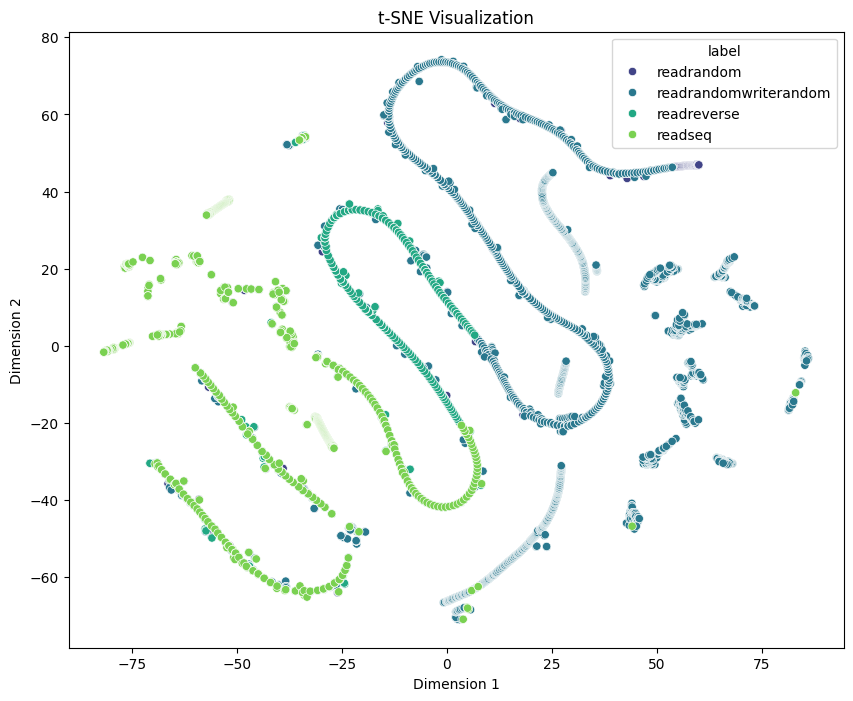

In [36]:
df_tsne = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['label'] = df['label']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='label', data=df_tsne, palette='viridis')
plt.title('t-SNE Visualization')
plt.show()

In [64]:
X = df_combined_normalized.drop(columns=['label_readrandom', 'label_readrandomwriterandom', 'label_readreverse', 'label_readseq'])
y = df_combined_normalized[['label_readrandom', 'label_readrandomwriterandom', 'label_readreverse', 'label_readseq']]

In [65]:
y.head()

,label_readrandom,label_readrandomwriterandom,label_readreverse,label_readseq
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [66]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.idxmax(axis=1))

In [69]:
print(y_encoded)

[0 0 0 ... 3 3 3]


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (149908, 6)
Shape of X_test: (37477, 6)
Shape of y_train: (149908, 4)
Shape of y_test: (37477, 4)


In [72]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.idxmax(axis=1))
y_test_encoded = label_encoder.transform(y_test.idxmax(axis=1))

In [82]:
def build_model():
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))

    alpha_schedule = tf.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0001, decay_steps=10000, decay_rate=0.9)
    optimizer = Adam(learning_rate=alpha_schedule)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


Let's train the model using 10-fold cross validation to prevent from overfitting

In [80]:
from keras.utils import to_categorical


y_train_one_hot = to_categorical(y_train, num_classes=4)
y_val_onehot = to_categorical(y_test, num_classes=4)

In [84]:
model = build_model()


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
4685/4685 - 19s - loss: 0.3144 - accuracy: 0.9138 - val_loss: 0.1479 - val_accuracy: 0.9473 - 19s/epoch - 4ms/step
Epoch 2/50
4685/4685 - 16s - loss: 0.1588 - accuracy: 0.9453 - val_loss: 0.1366 - val_accuracy: 0.9521 - 16s/epoch - 3ms/step
Epoch 3/50
4685/4685 - 16s - loss: 0.1471 - accuracy: 0.9485 - val_loss: 0.1290 - val_accuracy: 0.9538 - 16s/epoch - 3ms/step
Epoch 4/50
4685/4685 - 16s - loss: 0.1406 - accuracy: 0.9515 - val_loss: 0.1249 - val_accuracy: 0.9597 - 16s/epoch - 4ms/step
Epoch 5/50
4685/4685 - 16s - loss: 0.1350 - accuracy: 0.9535 - val_loss: 0.1211 - val_accuracy: 0.9593 - 16s/epoch - 3ms/step
Epoch 6/50
4685/4685 - 17s - loss: 0.1307 - accuracy: 0.9547 - val_loss: 0.1173 - val_accuracy: 0.9600 - 17s/epoch - 4ms/step
Epoch 7/50
4685/4685 - 17s - loss: 0.1272 - accuracy: 0.9559 - val_loss: 0.1145 - val_accuracy: 0.9600 - 17s/epoch - 4ms/step
Epoch 8/50
4685/4685 - 19s - loss: 0.1242 - accuracy: 0.9567 - val_loss: 0.1119 - val_accuracy: 0.9598 - 19s/epoch - 4

In [86]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test.values, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

1172/1172 [==============================] - 2s 2ms/step
Accuracy: 0.9626
F1-Score: 0.9567


In [57]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.values.flatten())
y_onehot = to_categorical(y_encoded, num_classes=len(label_encoder.classes_))

In [63]:
from sklearn.model_selection import KFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, np.argmax(y_onehot, axis=1))):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y_onehot[train_idx], y_onehot[val_idx]

    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=30, input_length=X_train.shape[1]))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(4, activation='softmax'))

    alpha_schedule = tf.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0001, decay_steps=10000, decay_rate=0.9)
    optimizer = Adam(learning_rate=alpha_schedule)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=64, validation_data=(X_val_fold, y_val_fold), verbose=0)

    metrics = model.evaluate(X_val_fold, y_val_fold, verbose=0)

    accuracy_list.append(metrics[1])
    y_pred_fold = model.predict(X_val_fold)
    y_pred_classes_fold = np.argmax(y_pred_fold, axis=1)
    y_val_classes_fold = np.argmax(y_val_fold, axis=1)

    precision_fold = precision_score(y_val_classes_fold, y_pred_classes_fold, average='weighted')
    recall_fold = recall_score(y_val_classes_fold, y_pred_classes_fold, average='weighted')
    f1_fold = f1_score(y_val_classes_fold, y_pred_classes_fold, average='weighted')

    precision_list.append(precision_fold)
    recall_list.append(recall_fold)
    f1_list.append(f1_fold)

print("Average Accuracy:", np.mean(accuracy_list))
print("Average Precision:", np.mean(precision_list))
print("Average Recall:", np.mean(recall_list))
print("Average F1 Score:", np.mean(f1_list))

ValueError: Found input variables with inconsistent numbers of samples: [187385, 749540]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [88]:
dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(dt_model, param_grid, scoring=scorer, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Model:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Test Accuracy with Best Model: 0.9936494383221709


In [89]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []
hyperparameters = {
    'criterion':'entropy',
    'max_depth':None,
    'max_features':None,
    'min_samples_leaf':1,
    'min_samples_split':2,
    'splitter':'best'
    }

for train_index, test_index in kfold.split(X, y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]


    dt_model = DecisionTreeClassifier(random_state=42, **hyperparameters)
    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

    print(f"Accuracy for this fold: {accuracy:.4f}")
    print(f"Precision for this fold: {precision:.4f}")
    print(f"Recall for this fold: {recall:.4f}\n")

avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)

print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")

Accuracy for this fold: 0.9943
Precision for this fold: 0.9691
Recall for this fold: 0.9716

Accuracy for this fold: 0.9940
Precision for this fold: 0.9712
Recall for this fold: 0.9660

Accuracy for this fold: 0.9937
Precision for this fold: 0.9668
Recall for this fold: 0.9692

Accuracy for this fold: 0.9931
Precision for this fold: 0.9620
Recall for this fold: 0.9625

Accuracy for this fold: 0.9954
Precision for this fold: 0.9714
Recall for this fold: 0.9837

Accuracy for this fold: 0.9962
Precision for this fold: 0.9806
Recall for this fold: 0.9769

Accuracy for this fold: 0.9965
Precision for this fold: 0.9784
Recall for this fold: 0.9856

Accuracy for this fold: 0.9946
Precision for this fold: 0.9765
Recall for this fold: 0.9672

Accuracy for this fold: 0.9959
Precision for this fold: 0.9793
Recall for this fold: 0.9798

Accuracy for this fold: 0.9947
Precision for this fold: 0.9724
Recall for this fold: 0.9676

Average Accuracy: 0.9948
Average Precision: 0.9728
Average Recall: 0.9

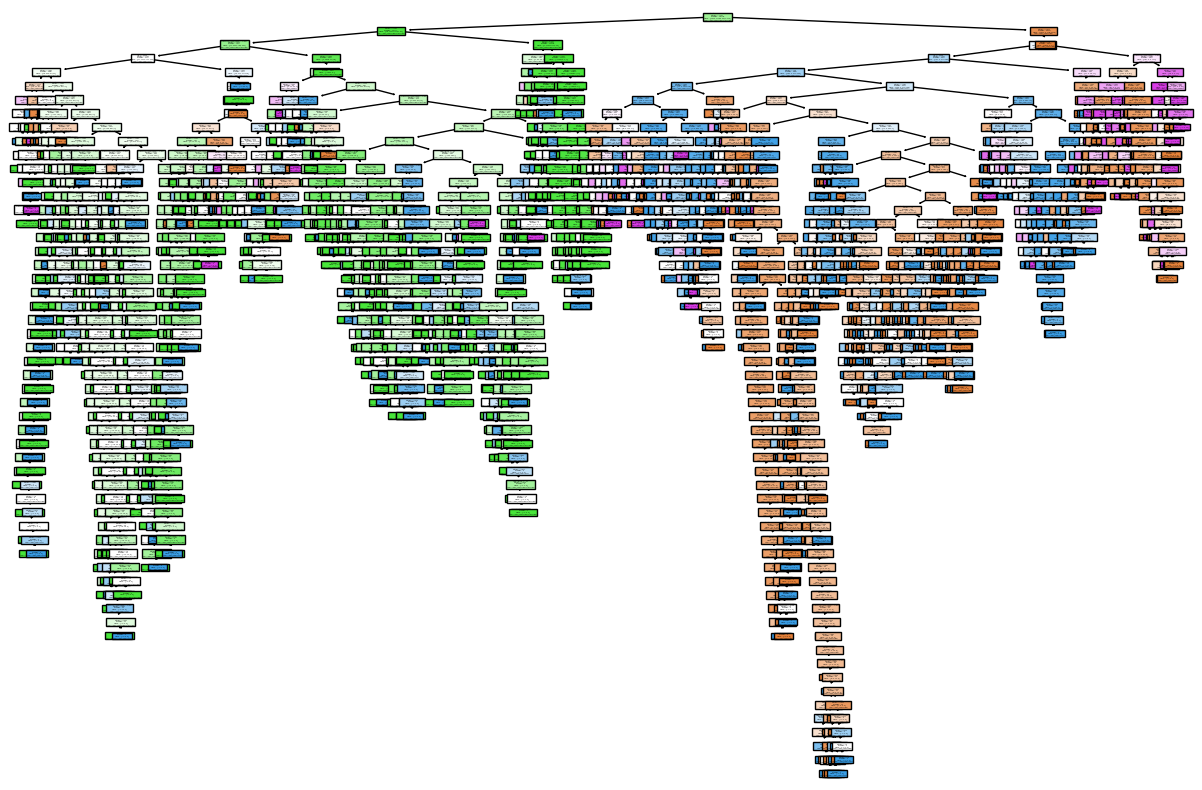

In [90]:
best_model = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    random_state=42
)


best_model.fit(X, y_encoded)

plt.figure(figsize=(15, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.show()